In [2]:
%%capture
!pip install diffusers transformers

import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float32
).to('cuda')

  0%|          | 0/50 [00:00<?, ?it/s]

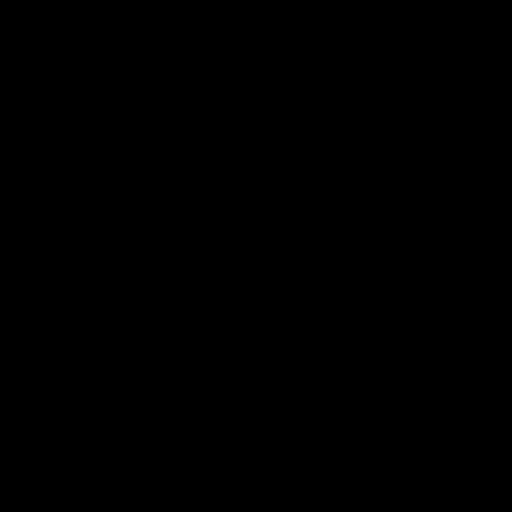

In [11]:
prompt = "Stalin, jojo"

image = pipe(prompt, guidance_scale=7.5).images[0]
image.save("test.png")
display(image)

In [20]:
!wget -O Hitler.jpg https://upload.wikimedia.org/wikipedia/commons/d/dc/Adolf_Hitler_cropped_restored.jpg

--2022-12-23 12:32:19--  https://upload.wikimedia.org/wikipedia/commons/d/dc/Adolf_Hitler_cropped_restored.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085703 (1.0M) [image/jpeg]
Saving to: ‘Hitler.jpg’

Hitler.jpg          100%[===================>]   1.04M  --.-KB/s    in 0.04s   

2022-12-23 12:32:20 (24.9 MB/s) - ‘Hitler.jpg’ saved [1085703/1085703]



In [24]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float32
).to('cuda')

from PIL import Image

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

OutOfMemoryError: ignored

In [ ]:
prompt = "Eastern European man"

init_image = Image.open("Hitler.jpg")
init_image = init_image.resize((512, 612))
image = pipe(prompt=prompt, init_image=init_image, strength=0.6, guidance_scale=7.5).images[0]
display(image)